<a href="https://colab.research.google.com/github/parthasarathydNU/gen-ai-coursework/blob/main/advanced-llms/Advanced_LLMs_INFO_7374_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (50 points)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.nn import functional as F

## Problem 1 (20 points)

Optimize the following loss:
$L = (leaky\_relu(w1 * x1 + w2 * x2) - 5) ^ 2$

This represents a single neuron with 2 inputs (x1 and x2) with tunable parameters (w1 and w2). The neuron has leaky relu activation function defined below. The output should be equal to 5. We are measuring the loss using the L2 loss.


$\text{LeakyReLU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
0.01 * x, & \text{otherwise}
\end{cases}$


Hints:
1. Since leaky relu is a piecewise function (is calculated different depending on the value of x), the derivative calculation will also be calculated differently depending on the value of x
2. Consider that:

$sum = w1 * x1 + w2 * x2$

$output = leaky\_relu(sum)$

$L = (output - 5) ^ 2$

How can we use the chain rule to $\frac{\delta L}{\delta w1}$ and $\frac{\delta L}{\delta w2}$?


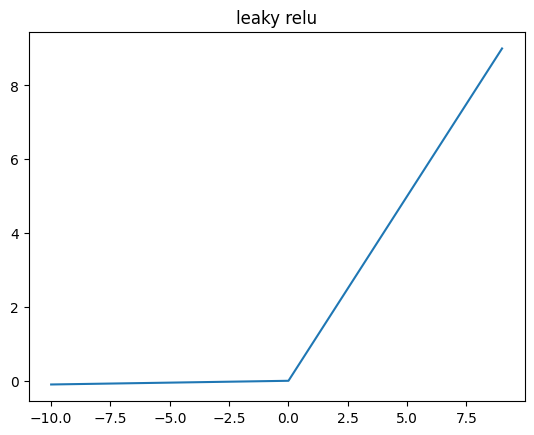

In [ ]:
def leaky_relu(x):
    if x > 0:
        return x
    else:
        return 0.01 * x

xs = np.arange(-10, 10)

ys = [leaky_relu(x) for x in xs]
plt.title('leaky relu')
plt.plot(xs, ys)

### 1a. Backpropagation by hand (10 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

In [ ]:
# initialization

x1 = 5 # data
x2 = 6

w1 = 7 # model params
w2 = 8

lr = 0.01

for i in range(100):
    # implement here
    pass


print(leaky_relu(x1 * w1 + x2 * w2))

### 1b. Reimplement 1a using torch. (5 points)

Do not use `torch.optim`

In [ ]:
x1 = torch.tensor(3., requires_grad=False) # data
x2 = torch.tensor(4., requires_grad=False)

w1 = torch.tensor(5., requires_grad=True) # model params
w2 = torch.tensor(6., requires_grad=True)

lr = 0.01

for i in range(100):
    # implement
    pass

prediction = (F.leaky_relu(x1*w1 + x2*w2)).detach().item()

print(f"prediction: ", prediction)

### 1c. Implement a 2 layer neural network. (5 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the leaky relu activation. The second layer should not use an activation function.

Train the model so that it outputs 5. Use an L2 loss as we did in 1a and 1b.

[Pytorch docs on how to use leaky relu]("https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html")

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        # implement
        pass
    def forward(self, x):
        # implement
        pass

x = torch.randn((4, 32)).float()

net = MLP()

for _ in range(100):
    # implement
    pass

prediction = net(x)
print(f"{prediction=}")

## Problem 2 (30 points)

The objective is predict 0.6. This time, we will use an L1 loss, a sigmoid activation function, and 3 inputs instead. Specifically,


$prediction = sigmoid(w1 * x1 + w2 * x2 + w3 * x3)$

$loss = l1(prediction, 0.6)$

where $sigmoid$ and $l1$ is defined as:

$sigmoid(x) = \frac{1}{1+e^{-x}}$

and $l1(prediction, target) = absolute\_value(prediction - target)$

$\text{absolute_value}(x) = \begin{cases}
x, & \text{if } x > 0 \\
-x, & \text{otherwise}
\end{cases}$


Note that the absolute value function is a piece wise function, similar to leaky_relu.

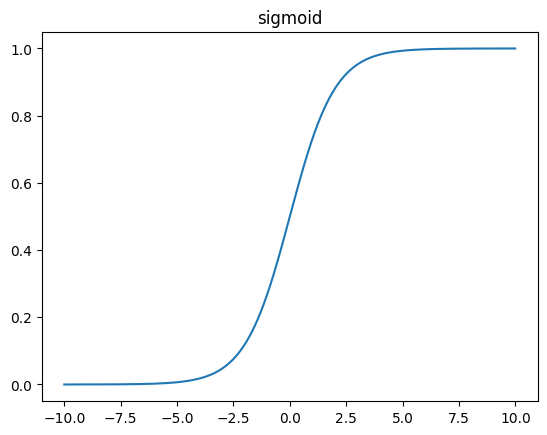

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.01)

ys = [sigmoid(x) for x in xs]
plt.title('sigmoid')
plt.plot(xs, ys)

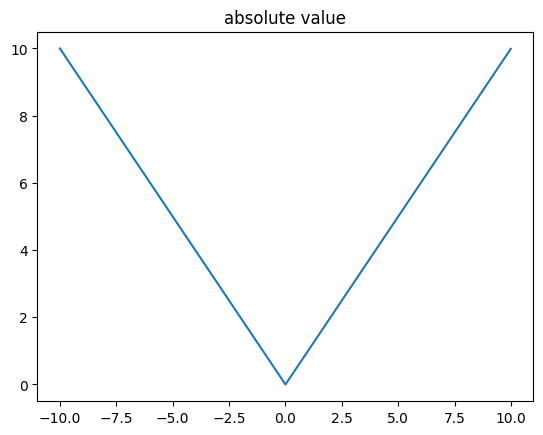

In [ ]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

xs = np.arange(-10, 10, 0.01)

ys = [absolute_value(x) for x in xs]
plt.title('absolute value')
plt.plot(xs, ys)

### 2a. Backpropagation by hand (15 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

In [ ]:
# initialization

x1, x2, x3 = 0.5, 0.6, 0.7 # data
w1, w2, w3 = 0.7, 0.8, 0.9 # model

lr = 0.01

for i in range(100):
    # implement here
    pass


print(sigmoid(x1 * w1 + x2 * w2 + x3 * w3))

### 2b. Reimplement 2a using torch. (5 points)

Do not use `torch.optim`

In [ ]:
# implement here (follow the structure of 1b)

### 2c. Implement a 2 layer neural network. (10 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the sigmoid activation. The second layer should also use a sigmoid activation function.

Train the model so that it outputs 0.6. Use an L2 loss as we did in 1a and 1b.

[PyTorch docs for how to use sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

In [ ]:
# implement here (follow the structure of 1c)